<a href="https://colab.research.google.com/github/aruntakhur/DeepLearning_Aut_2020_IIITDWD/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

In [47]:
def findFiles(path): return glob.glob(path)

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
print(findFiles('/content/drive/My Drive/data/data/names/*.txt'))

['/content/drive/My Drive/data/data/names/Arabic.txt', '/content/drive/My Drive/data/data/names/Chinese.txt', '/content/drive/My Drive/data/data/names/Czech.txt', '/content/drive/My Drive/data/data/names/Dutch.txt', '/content/drive/My Drive/data/data/names/English.txt', '/content/drive/My Drive/data/data/names/French.txt', '/content/drive/My Drive/data/data/names/German.txt', '/content/drive/My Drive/data/data/names/Irish.txt', '/content/drive/My Drive/data/data/names/Greek.txt', '/content/drive/My Drive/data/data/names/Italian.txt', '/content/drive/My Drive/data/data/names/Korean.txt', '/content/drive/My Drive/data/data/names/Japanese.txt', '/content/drive/My Drive/data/data/names/Portuguese.txt', '/content/drive/My Drive/data/data/names/Polish.txt', '/content/drive/My Drive/data/data/names/Scottish.txt', '/content/drive/My Drive/data/data/names/Russian.txt', '/content/drive/My Drive/data/data/names/Vietnamese.txt', '/content/drive/My Drive/data/data/names/Spanish.txt']


In [53]:
import unicodedata
import string
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [54]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [55]:
print(unicodeToAscii('Ślusàrski'))

Slusarski


In [121]:
# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('/content/drive/My Drive/data/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [120]:
print(all_categories)


['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Irish', 'Greek', 'Italian', 'Korean', 'Japanese', 'Portuguese', 'Polish', 'Scottish', 'Russian', 'Vietnamese', 'Spanish']
{'Arabic': ['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari', 'Maalouf', 'Gerges', 'Naifeh', 'Guirguis', 'Baba', 'Sabbagh', 'Attia', 'Tahan', 'Haddad', 'Aswad', 'Najjar', 'Dagher', 'Maloof', 'Isa', 'Asghar', 'Nader', 'Gaber', 'Abboud', 'Maalouf', 'Zogby', 'Srour', 'Bahar', 'Mustafa', 'Hanania', 'Daher', 'Tuma', 'Nahas', 'Saliba', 'Shamoon', 'Handal', 'Baba', 'Amari', 'Bahar', 'Atiyeh', 'Said', 'Khouri', 'Tahan', 'Baba', 'Mustafa', 'Guirguis', 'Sleiman', 'Seif', 'Dagher', 'Bahar', 'Gaber', 'Harb', 'Seif', 'Asker', 'Nader', 'Antar', 'Awad', 'Srour', 'Shadid', 'Hajjar', 'Hanania', 'Kalb', 'Shadid', 'Bazzi', 'Mustafa', 'Masih', 'Ghanem', 'Haddad', 'Isa', 'Antoun', 'Sarraf', 'Sleiman', 'Dagher', 'Najjar', 'Malouf', 'Nahas', 'Naser', 'Saliba', 'Shamon', 'Malouf', 'Kalb', 'Daher', 'Maalouf', 'Wasem', 'Ka

In [63]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [64]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [65]:
print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [66]:
n_letters

57

In [68]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [69]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [70]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8446, -2.8879, -2.8451, -2.8590, -2.9093, -2.8362, -2.8879, -2.9212,
         -2.8462, -2.9522, -2.8644, -2.8777, -2.7981, -2.9356, -2.9462, -2.8340,
         -3.0060, -3.0046]], grad_fn=<LogSoftmaxBackward>)


In [71]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Portuguese', 12)


In [72]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = French / line = Sarkozy
category = Russian / line = Mindra
category = Arabic / line = Abboud
category = Irish / line = Ceallach
category = Vietnamese / line = Chu
category = Korean / line = Gu
category = French / line = Lambert
category = Portuguese / line = Pinheiro
category = Greek / line = Tsangaris
category = Russian / line = Abzhaliloff


In [73]:
criterion = nn.NLLLoss()

In [74]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [75]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 8s) 2.8698 Pak / Polish ✗ (Korean)
10000 10% (0m 17s) 2.4689 Magro / Arabic ✗ (Italian)
15000 15% (0m 26s) 2.4106 Oichi / Italian ✗ (Japanese)
20000 20% (0m 34s) 1.7076 Maneates / Greek ✓
25000 25% (0m 43s) 2.9910 Kourempes / Dutch ✗ (Greek)
30000 30% (0m 52s) 3.3609 Roldan / Irish ✗ (Spanish)
35000 35% (1m 1s) 2.1600 Kunze / Korean ✗ (German)
40000 40% (1m 9s) 0.4134 Ferreiro / Portuguese ✓
45000 45% (1m 18s) 2.3637 Zimola / Japanese ✗ (Czech)
50000 50% (1m 26s) 0.9844 Soucek / Czech ✓
55000 55% (1m 35s) 1.6278 Pinho / Portuguese ✓
60000 60% (1m 44s) 1.0253 Atherton / English ✓
65000 65% (1m 53s) 0.5285 Jarov / Russian ✓
70000 70% (2m 1s) 0.2629 Donovan / Irish ✓
75000 75% (2m 10s) 0.2553 Zanetti / Italian ✓
80000 80% (2m 19s) 0.3621 Papadelias / Greek ✓
85000 85% (2m 28s) 2.0171 Bell / German ✗ (Scottish)
90000 90% (2m 36s) 0.5084 Danas / Greek ✓
95000 95% (2m 45s) 0.2727 Petrakis / Greek ✓
100000 100% (2m 54s) 1.0917 Chi / Korean ✗ (Chinese)


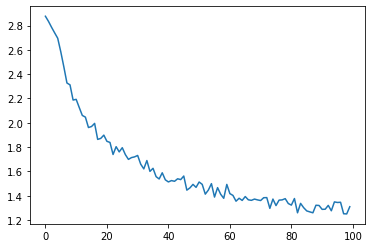

In [76]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

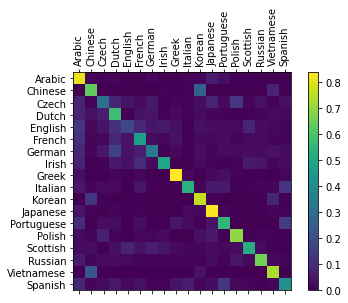

In [77]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [78]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.51) Russian
(-1.13) Czech
(-3.55) English

> Jackson
(-0.84) Scottish
(-0.93) English
(-2.57) Russian

> Satoshi
(-0.59) Arabic
(-1.17) Japanese
(-3.18) Italian
